In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import os
import networkx as nx

#from stellargraph import datasets
from IPython.display import display, HTML

from nltk.tokenize import sent_tokenize
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

%matplotlib inline

In [2]:
beer_cpd_scaled = pd.read_pickle('../data/beer_cpd_scaled.csv')

In [3]:
beer_cpd_scaled.head()

,alpha-terpineol,3-methylbutanal,geraniol,ethyl_isovalerate,ethyl_propionate,ammonia,ethyl_decanoate,caryophyllene,"2,3-butanedione",octyl_acetate,...,2-methyltetrahydrofuran-3-one,5-methylfurfural,benzaldehyde,ethyl_acetate,phenethyl_acetate,citronellol,ethanol,acetaldehyde,BeerChemEmbed,BeerChemEmbedNormalized
tasting_category_fine,,,,,,,,,,,,,,,,,,,,,
Amber,-0.163376,0.462464,-0.611052,-0.729536,0.040318,-0.525784,0.463199,0.677547,1.268017,-0.272836,...,0.592824,-0.558560,0.731008,0.452158,0.670019,-0.154037,0.171724,0.579328,"[0.8471688027493656, -0.9910336930770427, -0.8...","[0.06137874569009616, -0.07180198895460113, -0..."
Blond,0.058095,0.733056,0.012153,-0.860956,-0.700339,0.010572,0.201686,-0.411525,0.370169,-0.647636,...,-0.889698,-0.973868,-0.157707,-0.090804,1.060820,0.249187,0.079083,-0.205036,"[-0.07277248153695837, 0.6544970772811212, -0....","[-0.007736462528753869, 0.06957976430957304, -..."
Brett/cofermented,-0.581731,1.563356,0.414185,1.256595,-0.382052,-0.196080,1.272643,-0.591102,0.136965,-1.225945,...,-1.332926,-0.393169,-0.563488,-0.763120,-1.412385,0.793760,0.601230,-0.911334,"[-0.7694445457309484, 0.6460085608996451, -0.0...","[-0.05781568042360811, 0.04854076192379538, -0..."
Brown,-0.513674,-0.189355,-0.173098,-0.696099,0.165666,-0.358109,0.492104,-0.659018,-0.648674,0.300370,...,-0.273590,0.118919,-0.559518,0.353646,1.013286,-0.919228,0.702277,0.311988,"[0.8639788376167417, -0.3876289729960263, 0.09...","[0.10288896708790311, -0.04616171474167252, 0...."
Brut,0.222595,1.987772,-1.067532,0.949651,0.480541,-1.081021,1.461174,1.530182,-1.256493,1.083035,...,2.658205,0.582602,0.801914,0.929850,-1.152881,0.804404,1.550359,1.028604,"[-2.1879799012094736, -1.5616740251425654, -1....","[-0.06307791933471599, -0.04502196209874281, -..."


In [4]:
np.stack(beer_cpd_scaled['BeerChemEmbedNormalized'])

array([[ 0.06137875, -0.07180199, -0.06214608, ..., -0.03329985,
        -0.05306484,  0.01033412],
       [-0.00773646,  0.06957976, -0.03671401, ...,  0.00858092,
         0.09803638,  0.10377757],
       [-0.05781568,  0.04854076, -0.00077008, ..., -0.00060692,
         0.06995606, -0.08500702],
       ...,
       [ 0.02525124, -0.05545421, -0.01017993, ...,  0.00415765,
        -0.1020445 , -0.05659417],
       [ 0.07140228, -0.07313596, -0.00423888, ..., -0.01867611,
         0.020861  , -0.04619265],
       [ 0.00078008,  0.08104875,  0.07307529, ..., -0.02462389,
         0.05683021, -0.02426897]])

In [5]:
flavor_nodes_embed = pd.read_pickle('../data/flavor_nodes_embed.csv')

In [6]:
flavor_nodes_embed.head()

,node_id,name,id,node_type,is_hub,FlavorGraphEmbed,FlavorGraphEmbedNormalized
0,0,1%_fat_buttermilk,NaN,ingredient,no_hub,"[-0.10600116, 0.047149494, 0.10841199, 0.07235...","[-0.0653567, 0.02907077, 0.06684314, 0.0446103..."
1,1,1%_fat_cottage_cheese,NaN,ingredient,no_hub,"[-0.015829312, 0.09736368, -0.0006226096, 0.13...","[-0.008442499, 0.05192852, -0.00033206627, 0.0..."
2,3,10%_cream,NaN,ingredient,no_hub,"[-0.10132008, 0.033723958, 0.064727835, 0.1566...","[-0.057408284, 0.019108104, 0.036675002, 0.088..."
3,4,100%_bran,NaN,ingredient,no_hub,"[-0.10309663, 0.03204953, 0.08858223, 0.105722...","[-0.061783995, 0.01920672, 0.053085774, 0.0633..."
4,5,10_inch_flour_tortilla,NaN,ingredient,no_hub,"[-0.09346332, 0.120890595, 0.10606088, 0.10007...","[-0.036163356, 0.046775673, 0.041037675, 0.038..."


In [7]:
fg_beers = flavor_nodes_embed.loc[flavor_nodes_embed['name'].astype(str).str.contains('beer')]

In [8]:
fg_beers.shape

(18, 7)

In [9]:
np.stack(fg_beers['FlavorGraphEmbedNormalized'])

array([[-0.05985759, -0.0002793 ,  0.0248268 , ...,  0.04535919,
        -0.0622658 , -0.06934816],
       [-0.00276788,  0.0344836 ,  0.00867497, ..., -0.00552624,
        -0.04813477, -0.05597106],
       [-0.0282876 , -0.06775218, -0.01684969, ..., -0.06876759,
        -0.07557697, -0.00947072],
       ...,
       [-0.04239987,  0.06240345,  0.06212971, ...,  0.02280485,
        -0.01776593, -0.08060075],
       [-0.03532704, -0.06480884, -0.0299285 , ..., -0.05420936,
         0.05026651, -0.01939848],
       [-0.00999712, -0.07571001, -0.00820557, ..., -0.07650489,
         0.02867715, -0.00720516]], dtype=float32)

In [10]:
#first PCA of beer vectors

In [11]:
np.stack(flavor_nodes_embed['FlavorGraphEmbedNormalized'])

array([[-0.0653567 ,  0.02907077,  0.06684314, ..., -0.01938636,
        -0.04087467, -0.07932916],
       [-0.0084425 ,  0.05192852, -0.00033207, ..., -0.04920936,
        -0.06480113, -0.06509405],
       [-0.05740828,  0.0191081 ,  0.036675  , ..., -0.12857613,
        -0.0247415 , -0.11527327],
       ...,
       [-0.09880202, -0.10419364, -0.04975617, ..., -0.03229493,
        -0.04282098, -0.04133242],
       [ 0.06318964, -0.088865  , -0.0830836 , ..., -0.0573247 ,
         0.00515691, -0.00442141],
       [-0.07725193, -0.05636648, -0.00037687, ..., -0.01238927,
        -0.04687339, -0.05610338]], dtype=float32)

In [12]:
pca = PCA()
pca.fit(np.stack(flavor_nodes_embed['FlavorGraphEmbedNormalized']))
food_result = pca.transform(np.stack(flavor_nodes_embed['FlavorGraphEmbedNormalized']))
beer_result = pca.transform(np.stack(beer_cpd_scaled['BeerChemEmbedNormalized']))

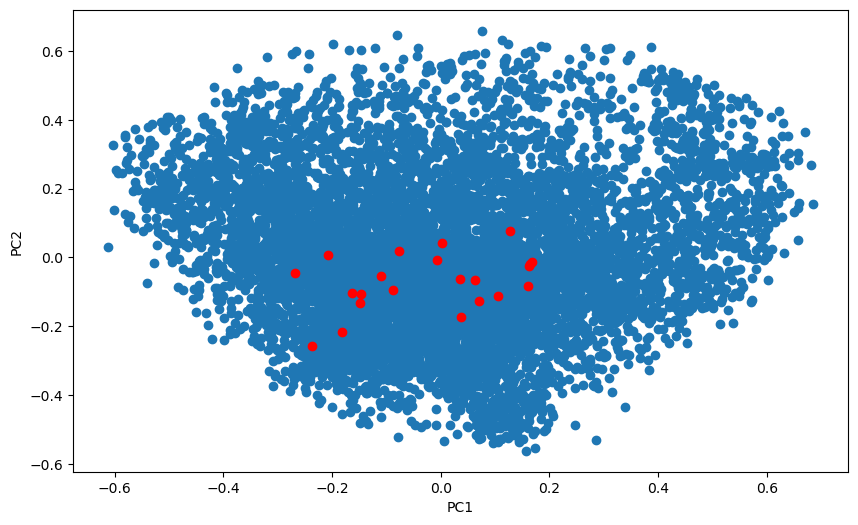

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(food_result[:,0], food_result[:,1])
plt.scatter(beer_result[:,0] , beer_result[:,1], color='red')
#for i, word in enumerate(words):
  #plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.xlabel("PC1")
plt.ylabel("PC2");

In [14]:
stacked_vectors = np.vstack([(np.stack(flavor_nodes_embed['FlavorGraphEmbedNormalized'])),(np.stack(beer_cpd_scaled['BeerChemEmbedNormalized'])), (np.stack(fg_beers['FlavorGraphEmbedNormalized']))])

In [15]:
trans = TSNE(n_components=3)
tsne_vectors=trans.fit_transform(stacked_vectors)
#food_result = trans.transform(np.stack(flavor_nodes_embed['FlavorGraphEmbedNormalized']))
#beer_result = trans.transform(np.stack(beer_cpd_scaled['BeerChemEmbedNormalized']))

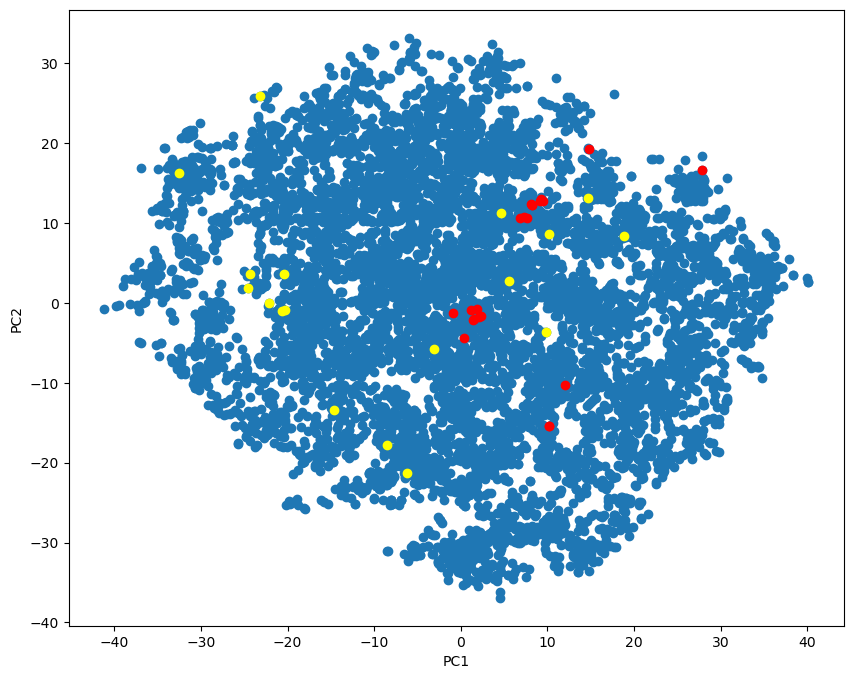

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(tsne_vectors[:-22,0], tsne_vectors[:-22,1])
plt.scatter(tsne_vectors[-40:-18,0] , tsne_vectors[-40:-18,1], color='red')
plt.scatter(tsne_vectors[-18:,0] , tsne_vectors[-18:,1], color='yellow')
#for i, word in enumerate(words):
  #plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.xlabel("PC1")
plt.ylabel("PC2");